<a href="https://colab.research.google.com/github/ekayuniar/MachineLearning/blob/main/Eka_Yuniar_dicoding_revisi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assalamualaikum wr.wb Salam sejahtera Perkenalkan Nama saya Eka Yuniar, dan berikut ini merupakan project akhir saya yaitu klasifikasi gambar menggunakan jaringan saraf Tiruan (JST)**

In [3]:
# Download Dataset
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-06 03:09:17--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  3.97MB/s    in 1m 41s  

2021-07-06 03:10:59 (3.06 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [19]:
# unzip dataset
import os
import zipfile

local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content')
zip_ref.close()

In [20]:
# Menyiapkan masing-masing folder untuk dataser
import os                                                                         
folder_gunting = os.path.join('/content/rockpaperscissors/scissors')                
folder_batu= os.path.join('/content/rockpaperscissors/rock')                        
folder_kertas = os.path.join('/content/rockpaperscissors/paper')                   


In [21]:
# Menghitung jumlah dataset di masing-masing folder
print('Jumlah total Data Gambar gunting:', len(os.listdir(folder_gunting)))  
print('Jumlah total Data Gambar batu:', len(os.listdir(folder_batu))) 
print('Jumlah total Data Gambar kertas:', len(os.listdir(folder_kertas))) 

Jumlah total Data Gambar gunting: 750
Jumlah total Data Gambar batu: 726
Jumlah total Data Gambar kertas: 712


In [22]:
file_gunting = os.listdir(folder_gunting)
file_batu = os.listdir(folder_batu)
file_kertas = os.listdir(folder_kertas) 

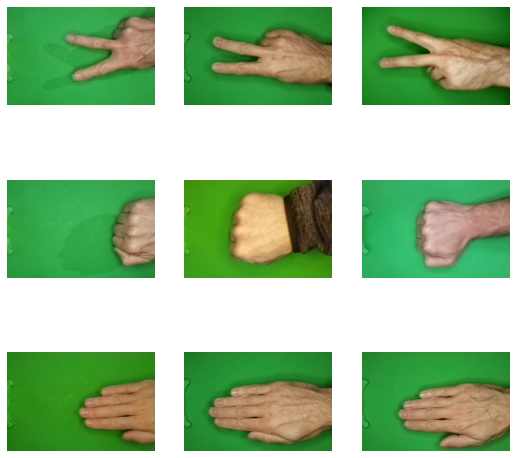

In [23]:
#Menampilkan Contoh Gambar Dataser
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 3
ncols = 3

pic_index = 0 

fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows *3)

pic_index += 4
gbr_tampil_gunting = [os.path.join(fold_gunting, fname)
                      for fname in file_gunting[pic_index-3:pic_index]]
gbr_tampil_batu = [os.path.join(fold_batu, fname)
                      for fname in file_batu[pic_index-3:pic_index]]
gbr_tampil_kertas = [os.path.join(fold_kertas, fname)
                      for fname in file_kertas[pic_index-3:pic_index]]

for i, img_path in enumerate(gbr_tampil_gunting + gbr_tampil_batu + gbr_tampil_kertas):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

    


**Menyiapkan Permodelan**

In [24]:
# Import Library yang dibutuhkan 
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [26]:
#Menyiapkan folder yang akan dilakukan untuk generator dan Pemisahan data validation dan data training

BASIS_DIR = '/content/rockpaperscissors/rps-cv-images'
training_datagen = ImageDataGenerator(
    rescale = 1./255,
# >>>>>>>>>>>AUGMENTASI>>>>>>>>>>>>>>>>>>>>>>>>>>
    rotation_range = 4,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode ='nearest',
#>>>>>>>>>>>MEMECAH DATA MENJADI DATA TRAINING DAN DATA VALIDASI 40%<<<<<<<<<<<<<
  validation_split = 0.4)


In [28]:
# Jumlah Data Training sudah sesuai dengan ketentuan 1314
train_generator = training_datagen.flow_from_directory(
    BASIS_DIR,
    target_size=(150,150),
    class_mode = 'categorical',
    shuffle=True,
    subset='training'
)
# Jumlah Data Validasi juga sudah sesuai dengan ketentuan 874
validation_generator = training_datagen.flow_from_directory(
    BASIS_DIR,
    target_size=(150,150),
    class_mode ='categorical',
    shuffle = True,
    subset ='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [29]:
# Dengan menggunakan 3 hidden layer
model = tf.keras.models.Sequential(
    [
     # Layer 1
     tf.keras.layers.Conv2D(16, (3,3), 
                            activation='relu', input_shape=(150,150, 3)),
     tf.keras.layers.MaxPooling2D(2,2),

     # Layer 2
     tf.keras.layers.Conv2D(32, (3,3), 
                            activation='relu'
                            ),
     tf.keras.layers.MaxPooling2D(2,2),
     
     # Layer 3
     tf.keras.layers.Conv2D(64, (3,3),
                            activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),


     tf.keras.layers.Flatten(),
     tf.keras.layers.Dropout(0.5),

     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dense(3, activation='softmax')
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [30]:
# Loss Function Optimizer
# Menggunakan categorical krn ada 3 layer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [31]:
# Melatih JST
# menggunakan model.fit
history = model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=40,
    validation_data = validation_generator,
    validation_steps=2,
    verbose=2
)

Epoch 1/40
25/25 - 21s - loss: 1.1124 - accuracy: 0.3390 - val_loss: 1.0964 - val_accuracy: 0.3750
Epoch 2/40
25/25 - 21s - loss: 1.0508 - accuracy: 0.4450 - val_loss: 1.0106 - val_accuracy: 0.5156
Epoch 3/40
25/25 - 21s - loss: 0.9990 - accuracy: 0.5238 - val_loss: 0.8799 - val_accuracy: 0.5938
Epoch 4/40
25/25 - 20s - loss: 0.7636 - accuracy: 0.6779 - val_loss: 0.6835 - val_accuracy: 0.7812
Epoch 5/40
25/25 - 21s - loss: 0.5759 - accuracy: 0.7610 - val_loss: 0.2628 - val_accuracy: 0.9688
Epoch 6/40
25/25 - 20s - loss: 0.5033 - accuracy: 0.7961 - val_loss: 0.7272 - val_accuracy: 0.7031
Epoch 7/40
25/25 - 20s - loss: 0.5620 - accuracy: 0.7753 - val_loss: 0.4125 - val_accuracy: 0.8906
Epoch 8/40
25/25 - 21s - loss: 0.4312 - accuracy: 0.8350 - val_loss: 0.3372 - val_accuracy: 0.8906
Epoch 9/40
25/25 - 21s - loss: 0.4134 - accuracy: 0.8455 - val_loss: 0.3293 - val_accuracy: 0.8750
Epoch 10/40
25/25 - 20s - loss: 0.3787 - accuracy: 0.8584 - val_loss: 0.3694 - val_accuracy: 0.8594
Epoch 11/

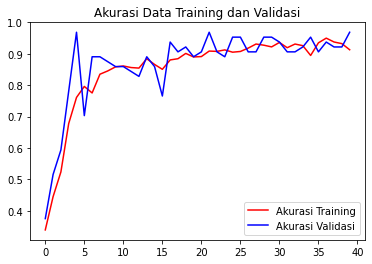

<Figure size 432x288 with 0 Axes>

In [32]:
# Menampilkan Tingkat accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc, 'r', label = 'Akurasi Training')
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Data Training dan Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

Berikut Gambar Akurasi Data Training dan Validasi yang telah dicoba

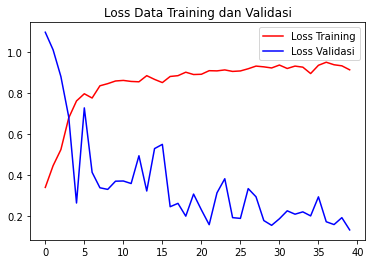

<Figure size 432x288 with 0 Axes>

In [33]:
# Menampilkan Loss Data
plt.plot(epochs,acc, 'r', label = 'Loss Training')
plt.plot(epochs, val_loss, 'b', label='Loss Validasi')
plt.title('Loss Data Training dan Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

Saving 0bioBZYFCXqJIulm.png to 0bioBZYFCXqJIulm.png
0bioBZYFCXqJIulm.png
Tangan Ini Menunjukkan bentuk BATU


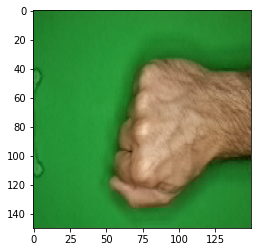

In [34]:
# Uji coba Upload Gambar 
import numpy as np                                                                
from google.colab import files                                                    
from keras.preprocessing import image                                            

uploaded = files.upload()                                                         

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))                             
  imgplot = plt.imshow(img)                                                      
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('Tangan Ini Menunjukkan bentuk KERTAS')                                 
  elif classes[0][1]==1:
    print('Tangan Ini Menunjukkan bentuk BATU')
  elif classes[0][2]==1:                                  
    print('Tangan Ini Menunjukkan bentuk GUNTING')                                
  else:
    print('Tidak Diketahui')                                                      